In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time 
import math
from math import fabs

# Задание функции и график




In [ ]:
EPS = (1.e-11) * 5  
p1 = len('Ледяев')
p2 = len('Антон')
q1 = len('Алексеевич')
q2 = len('Антон')

p = complex(p1, p2)
q = complex(q1, q2)
count_call = 0
print("Исследуемый полином z^2 + {0} * z + {1}".format(p, q))

Исследуемый полином z^2 + (6+5j) * z + (10+5j)


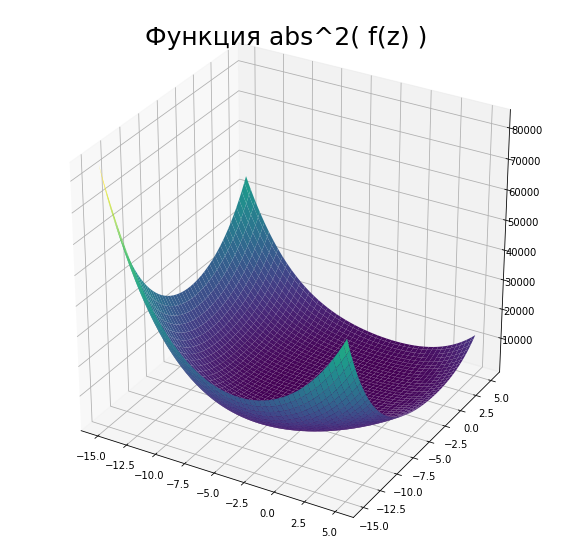

In [ ]:
def polynomial(x, y):
    z = complex(x, y)
    result = z**2 + p * z + q
    return result

def function(x, y):
    global count_call
    count_call += 1
    result = abs(polynomial(x, y))**2
    return result

def diff_function_x(x, y):
    global count_call
    count_call += 1
    return 4*x**3 + 36*x**2 + 4*x*y**2 + 20*x*y + 162*x + 12*y**2 + 20*y + 170

def diff_function_y(x, y):
    global count_call
    count_call += 1
    return 4*y*x**2 + 10*x**2 + 24*x*y + 20* x + 4*y**3 + 30*y**2 + 82*y - 40



def calculate_second_solution(result):
    arr = np.array([1 + 0.j, p, q])
    first = np.array([1 + 0.j, -result])
    second = np.polydiv(arr, first)
    return(-second[0][1].real, -second[0][1].imag)

def show_second_solution(result):
    arr = np.array([1 + 0.j, p, q])
    first = np.array([1 + 0.j, -result])
    second = np.polydiv(arr, first)
    print("Re = {0} Im = {1}".format('%.5f' % -second[0][1].real, '%.5f' % -second[0][1].imag))

def function_show():
    quantity = np.int(150)
    x = np.linspace(-15, 5, quantity)  
    y = np.linspace(-15, 5, quantity)
    x,y = np.meshgrid(x,y)
    func = np.vectorize(function)
    z = func(x, y)
    fig = plt.figure(figsize=(10,10))    
    axis = fig.add_subplot(projection='3d')    
    axis.plot_surface(x, y, z, cmap='viridis')
    plt.title("Функция abs^2( f(z) )", fontsize = 25, loc = 'center')
    plt.grid() 
    
function_show()

# Метод покоординатного спуска


In [ ]:
 def coordinate_descent_method(a,b):
    global count_call
    count_call = 0
    t1 = time()
    delta = 5*10**(-7)
    step_RE = step_IM = 0.5
    abs = function(a, b)
    
    count = 0
    print("{count}: Re = {0} Im = {1} abs^2(f) = {2}".format('%.5f' % a, '%.5f' % b, abs, count = count))
    print("step_RE: {0}".format(step_RE))
    print("step_IM: {0}".format(step_IM))
    print()

    data = {
            'Оптимизируется':[],
            'Значение шага':[],
            'Best_Re':[],
            'Best_Im':[],
            'Re':[],
            'Im':[],
            '|f|^2':[]
    }
    
    data['Re'].append("%.10f"%a)
    data['Best_Re'].append("%.5f"%a)
    data['Best_Im'].append("%.5f"%b)
    data['Im'].append("%.10f"%b)
    data['|f|^2'].append("%.10f"%abs)
    data['Оптимизируется'].append('Вещественная')
    data['Значение шага'].append("%.10f"%step_RE)
    while fabs(step_RE) > delta and fabs(step_IM) > delta:
        flag_RE = True
        flag_IM = False
        count_RE = count_IM =0
        change_flag = False
        
        
        while flag_RE:
            count += 1          
            #data['№'].append(count)
            #data['Точка'].append('Точка')
            #data['Re'].append("%.10f"%a)
            #data['Im'].append("%.10f"%b)
            #data['|f|^2'].append(abs)
            #data['Оптимизируется'].append('Вещественная')
            #data['Значение шага'].append(step_RE)
        
            data['Best_Re'].append("%.5f"%a)
            data['Best_Im'].append("%.5f"%b)
            new_point = a + step_RE
            new_f = function(new_point, b)

            
            

            if  new_f < abs:
                a = new_point
                abs = new_f
                count_RE += 1
            elif not change_flag and count_RE == 0: 
                step_RE = (-1) * step_RE
                change_flag = True
            else:
                step_RE = step_RE / 2
                flag_RE = False
                flag_IM = True  
            
            data['Re'].append("%.10f"%new_point)
            
            data['Im'].append("%.10f"%b)
            data['|f|^2'].append("%.10f"%new_f)
            data['Оптимизируется'].append('Вещественная')
            data['Значение шага'].append("%.10f"%step_RE)
            
        change_flag = False
        while flag_IM:
            count += 1         

            #data['№'].append(count)
            #data['Точка'].append('Точка')
            #data['Re'].append("%.10f"%a)
            #data['Im'].append("%.10f"%b)
            #data['|f|^2'].append(abs)
            #data['Оптимизируется'].append('Мнимая')
            #data['Значение шага'].append(step_IM)

            data['Best_Re'].append("%.5f"%a)
            data['Best_Im'].append("%.5f"%b)
            new_point = b + step_IM
            new_f = function(a, new_point)

            
            

            if  new_f < abs:
                b = new_point
                abs = new_f
                count_IM += 1
            elif not change_flag and count_IM == 0: 
                step_IM = (-1) * step_IM
                change_flag = True
            else:
                step_IM = step_IM / 2
                flag_RE = True
                flag_IM = False
            
            data['Re'].append("%.10f"%a)
            
            data['Im'].append("%.10f"%new_point)
            data['|f|^2'].append("%.10f"%new_f)
            data['Оптимизируется'].append('Мнимая')
            data['Значение шага'].append("%.10f"%step_IM)
            
    pd.set_option("display.max_rows", None, "display.max_columns", None)        
    data = pd.DataFrame(data)
    

    display(data)
    
    t2 = time()


    print("Время выполнения: {0} ms".format('%.1f' % ((t2 - t1) * 10**3)))
    print("{0} шагов".format(count))
    print("{0} вызовов функции".format(count_call))
    return complex(a, b)


result = coordinate_descent_method(0,0)
print("Re = {0} Im = {1}".format('%.5f' % result.real, '%.5f' % result.imag))
calculate_second_solution(result)
show_second_solution(result)
print( "\n**** Проверка второго корня:****\n")
a = calculate_second_solution(result)[0]
b = calculate_second_solution(result)[1]
result2 = coordinate_descent_method(a,b)
print("Re = {0} Im = {1}".format('%.5f' % result2.real, '%.5f' % result2.imag))


0: Re = 0.00000 Im = 0.00000 abs^2(f) = 125.00000000000001
step_RE: 0.5
step_IM: 0.5



,Оптимизируется,Значение шага,Best_Re,Best_Im,Re,Im,|f|^2
0,Вещественная,0.5000000000,0.00000,0.00000,0.0000000000,0.0000000000,125.0000000000
1,Вещественная,-0.5000000000,0.00000,0.00000,0.5000000000,0.0000000000,231.8125000000
2,Вещественная,-0.5000000000,0.00000,0.00000,-0.5000000000,0.0000000000,58.8125000000
3,Вещественная,-0.5000000000,-0.50000,0.00000,-1.0000000000,0.0000000000,25.0000000000
4,Вещественная,-0.5000000000,-1.00000,0.00000,-1.5000000000,0.0000000000,16.8125000000
5,Вещественная,-0.2500000000,-1.50000,0.00000,-2.0000000000,0.0000000000,29.0000000000
6,Мнимая,0.5000000000,-1.50000,0.00000,-1.5000000000,0.5000000000,1.2500000000
7,Мнимая,0.2500000000,-1.50000,0.50000,-1.5000000000,1.0000000000,7.8125000000
8,Вещественная,0.2500000000,-1.50000,0.50000,-1.7500000000,0.5000000000,6.2851562500
9,Вещественная,0.1250000000,-1.50000,0.50000,-1.2500000000,0.5000000000,1.9726562500


Время выполнения: 28.5 ms
93 шагов
94 вызовов функции
Re = -1.40287 Im = 0.63062
Re = -4.59713 Im = -5.63062

**** Проверка второго корня:****

0: Re = -4.59713 Im = -5.63062 abs^2(f) = 1.1349886289763348e-11
step_RE: 0.5
step_IM: 0.5



,Оптимизируется,Значение шага,Best_Re,Best_Im,Re,Im,|f|^2
0,Вещественная,0.5000000000,-4.59713,-5.63062,-4.5971250534,-5.6306247711,0.0000000000
1,Вещественная,-0.5000000000,-4.59713,-5.63062,-4.0971250534,-5.6306247711,11.6155748395
2,Вещественная,-0.2500000000,-4.59713,-5.63062,-5.0971250534,-5.6306247711,13.2126619268
3,Мнимая,-0.5000000000,-4.59713,-5.63062,-4.5971250534,-5.1306247711,10.8487948625
4,Мнимая,-0.2500000000,-4.59713,-5.63062,-4.5971250534,-6.1306247711,13.9794479463
5,Вещественная,0.2500000000,-4.59713,-5.63062,-4.8471250534,-5.6306247711,3.1916216701
6,Вещественная,0.1250000000,-4.59713,-5.63062,-4.3471250534,-5.6306247711,2.9920000215
7,Мнимая,0.2500000000,-4.59713,-5.63062,-4.5971250534,-5.8806247711,3.2874827275
8,Мнимая,0.1250000000,-4.59713,-5.63062,-4.5971250534,-5.3806247711,2.8961404748
9,Вещественная,-0.1250000000,-4.59713,-5.63062,-4.4721250534,-5.6306247711,0.7597474959


Время выполнения: 45.4 ms
80 шагов
81 вызовов функции
Re = -4.59713 Im = -5.63062


# Градиентные методы


## С дроблением шага

In [ ]:
def crushing_split_method():
    global count_call
    count_call = 0
    t1 = t2 = 0
    t1 = time()
    alpha = 10
    e = 0.5
    x = np.array([10., 10.])
    arr= np.array([10., 10.])
    abs = function(arr[0], arr[1])
    count = 0
    while abs > EPS:
        print("Шаг {count}: Re = {0} Im = {1} abs^2(f) = {2} alpha = {3}".format('%.5f' % x[0], '%.5f' % x[1], abs, '%.3f' % alpha, count = count))
        count += 1
        gradient_x = diff_function_x(*arr)
        gradient_y = diff_function_y(*arr)
        x[0] = arr[0] - alpha * gradient_x
        x[1] = arr[1] - alpha * gradient_y
        abs_new = function(*x)
        if abs_new - abs <= - alpha * e * (gradient_x  + gradient_y):
            arr= x
            abs = abs_new
        else:
            alpha = alpha * 0.1

    t2 = time()
    print("Время выполнения: {0} ms".format('%.1f' % ((t2 - t1) * 10**3)))
    print("{0} итераций".format(count))
    print("{0} вызовов функции".format(count_call))
    return complex(*x)

result = crushing_split_method()
print("Re = {0} Im = {1}".format('%.5f' % result.real, '%.5f' % result.imag))
show_second_solution(result)

Шаг 0: Re = 10.00000 Im = 10.00000 abs^2(f) = 99625.0 alpha = 10.000
Шаг 1: Re = -167890.00000 Im = -153790.00000 abs^2(f) = 99625.0 alpha = 1.000
Шаг 2: Re = -16780.00000 Im = -15370.00000 abs^2(f) = 99625.0 alpha = 0.100
Шаг 3: Re = -1669.00000 Im = -1528.00000 abs^2(f) = 99625.0 alpha = 0.010
Шаг 4: Re = -157.90000 Im = -143.80000 abs^2(f) = 99625.0 alpha = 0.001
Шаг 5: Re = -6.79000 Im = -5.38000 abs^2(f) = 317.3727722500007 alpha = 0.001
Шаг 6: Re = -6.45179 Im = -5.35409 abs^2(f) = 215.5749033110466 alpha = 0.001
Шаг 7: Re = -6.18887 Im = -5.34591 abs^2(f) = 153.28642155512966 alpha = 0.001
Шаг 8: Re = -5.97721 Im = -5.34804 abs^2(f) = 112.458710073141 alpha = 0.001
Шаг 9: Re = -5.80264 Im = -5.35634 abs^2(f) = 84.37530992467198 alpha = 0.001
Шаг 10: Re = -5.65610 Im = -5.36832 abs^2(f) = 64.36383241241586 alpha = 0.001
Шаг 11: Re = -5.53144 Im = -5.38241 abs^2(f) = 49.71965208103655 alpha = 0.001
Шаг 12: Re = -5.42431 Im = -5.39758 abs^2(f) = 38.7816038663046 alpha = 0.001
Шаг 1

## С постоянным шагом


In [ ]:
def constant_split_method():
    global count_call
    count_call = 0
    t1 = t2 = 0
    t1 = time()
    alpha = 1.e-4
    print("alpha = {0}".format(alpha))
    arr = np.array([0., 0.])
    abs = function(arr[0], arr[1])
    count = 0
    while abs > EPS:
        print("Шаг {count}: Re = {0} Im = {1} abs^2(f) = {2}".format('%.5f' % arr[0], '%.5f' % arr[1], abs, count = count))
        count += 1
        gradient_x = diff_function_x(*arr)
        gradient_y = diff_function_y(*arr)
        arr[0] -= alpha * gradient_x
        arr[1] -= alpha * gradient_y
        abs = function(*arr)

    t2 = time()
    print("Время выполнения: {0} ms".format('%.1f' % ((t2 - t1) * 10**3)))
    print("{0} итераций".format(count))
    print("{0} вызовов функции".format(count_call))
    return complex(*arr)

result = constant_split_method()
print("Re = {0} Im = {1}".format('%.5f' % result.real, '%.5f' % result.imag))
show_second_solution(result)


alpha = 0.0001
Шаг 0: Re = 0.00000 Im = 0.00000 abs^2(f) = 125.00000000000001
Шаг 1: Re = -0.01700 Im = 0.00400 abs^2(f) = 121.97265507302498
Шаг 2: Re = -0.03373 Im = 0.00800 abs^2(f) = 119.03427197348046
Шаг 3: Re = -0.05021 Im = 0.01200 abs^2(f) = 116.18153343111503
Шаг 4: Re = -0.06643 Im = 0.01600 abs^2(f) = 113.41127700384776
Шаг 5: Re = -0.08240 Im = 0.02000 abs^2(f) = 110.72048640401572
Шаг 6: Re = -0.09812 Im = 0.02400 abs^2(f) = 108.10628338794812
Шаг 7: Re = -0.11361 Im = 0.02799 abs^2(f) = 105.5659201673899
Шаг 8: Re = -0.12887 Im = 0.03198 abs^2(f) = 103.09677230470497
Шаг 9: Re = -0.14389 Im = 0.03597 abs^2(f) = 100.6963320568914
Шаг 10: Re = -0.15870 Im = 0.03995 abs^2(f) = 98.36220213625923
Шаг 11: Re = -0.17329 Im = 0.04392 abs^2(f) = 96.09208985819379
Шаг 12: Re = -0.18766 Im = 0.04789 abs^2(f) = 93.88380164877154
Шаг 13: Re = -0.20183 Im = 0.05185 abs^2(f) = 91.73523788713338
Шаг 14: Re = -0.21578 Im = 0.05581 abs^2(f) = 89.6443880594744
Шаг 15: Re = -0.22954 Im = 0.

## С заранее заданным шагом

In [ ]:
def predictable_split_method():
    global count_call
    count_call = 0
    t1 = t2 = 0
    t1 = time()

    arr= np.array([10., 10.])
    abs = function(arr[0], arr[1])
    abs_gradient = 0

    count = 0
    while abs > EPS:
        
        print("Шаг {0}: Re = {1} Im = {2} abs^2(f) = {3}".format(count, '%.5f' % arr[0], '%.5f' % arr[1], abs))

        count += 1

        gradient_x = diff_function_x(*arr)
        gradient_y = diff_function_y(*arr)
        abs_gradient = np.sqrt(gradient_x**2 + gradient_y**2)
        
        arr[0] -= 5/count * gradient_x / abs_gradient
        arr[1] -= 5/count * gradient_y / abs_gradient
        abs = function(*arr)

    t2 = time()

    print("Время выполнения: {0} ms".format('%.1f' % ((t2 - t1) * 10**3)))
    print("{0} итераций".format(count))
    print("{0} вызовов функции".format(count_call))
    return complex(*arr)

result = predictable_split_method()
print("Re = {0} Im = {1}".format('%.5f' % result.real, '%.5f' % result.imag))
show_second_solution(result)

Шаг 0: Re = 10.00000 Im = 10.00000 abs^2(f) = 99625.0
Шаг 1: Re = 6.31304 Im = 6.62267 abs^2(f) = 25690.068659818895
Шаг 2: Re = 4.44768 Im = 4.95821 abs^2(f) = 10270.059505875706
Шаг 3: Re = 3.18880 Im = 3.86596 abs^2(f) = 4758.066513086469
Шаг 4: Re = 2.23143 Im = 3.06226 abs^2(f) = 2336.5040347295244
Шаг 5: Re = 1.45296 Im = 2.43458 abs^2(f) = 1159.8442016064853
Шаг 6: Re = 0.79155 Im = 1.92765 abs^2(f) = 559.8822822145542
Шаг 7: Re = 0.21129 Im = 1.51111 abs^2(f) = 250.60157846147752
Шаг 8: Re = -0.31085 Im = 1.16760 abs^2(f) = 95.6465988729195
Шаг 9: Re = -0.79099 Im = 0.88813 abs^2(f) = 25.112210767963234
Шаг 10: Re = -1.24173 Im = 0.67171 abs^2(f) = 1.409917287065088
Шаг 11: Re = -1.68021 Im = 0.55196 abs^2(f) = 3.883696719635727
Шаг 12: Re = -1.27586 Im = 0.65250 abs^2(f) = 0.8390367126638867
Шаг 13: Re = -1.65393 Im = 0.58184 abs^2(f) = 3.090953614025534
Шаг 14: Re = -1.30142 Im = 0.63920 abs^2(f) = 0.5201151564671247
Шаг 15: Re = -1.63321 Im = 0.60714 abs^2(f) = 2.55666584177